# Trabalho Final

## Informações do Dataset

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde acontecem algumas festas com turmas de alunos de 18 a 28 anos (média). O conjunto de dados utilizado para esta atividade possui 7 atributos, sendo uma Meta, com período de um ano.

Dataset: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

1.   Data
2.   Temperatura média (C)
3.   Temperatura mínima (C)
4.   Temperatura máxima (C)
5.   Precipitação (mm)
6.   Final de semana
7.   Consumo de cerveja (litros)



In [12]:
# Carregando repositório com dataset
!git clone https://github.com/Andrewsas/trabalho-fundamentos-cid.git

# Importando bibliotecas
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Renomeando dataset
!mv './trabalho-fundamentos-cid/data/Consumo_cerveja.csv' 'dataset_consumo_cerveja.csv'

# Criando dataframe
df_consumo_cerveja = pd.read_csv('dataset_consumo_cerveja.csv')

fatal: destination path 'trabalho-fundamentos-cid' already exists and is not an empty directory.
mv: cannot stat './trabalho-fundamentos-cid/data/Consumo_cerveja.csv': No such file or directory


# Normalização de Dados

In [13]:
# Dados iniciais
df_consumo_cerveja

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Identificando se existe valores nulos no dataframe
df_consumo_cerveja.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [22]:
# Removendo valores nulos
df_consumo_cerveja.dropna(inplace=True)

#Treat numeric values from dataframe
def str_to_num(df_aux, index):
  for i in index:
    col_name = df_aux.columns[i]
    df_aux[col_name] = df_aux[col_name].str.replace('.', '')
    df_aux[col_name] = df_aux[col_name].str.replace(',', '.')
    df_aux[col_name] = pd.to_numeric(df_aux[col_name])
  return df_aux

#transform field types
df_consumo_cerveja = str_to_num(df_consumo_cerveja, [1, 2, 3, 4])

# Apresentando dataframe normalizado
df_consumo_cerveja

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


Convertendo Valores para Numéricos

In [23]:
df_consumo_cerveja[["Temperatura Media (C)", "Temperatura Minima (C)", "Temperatura Maxima (C)", "Precipitacao (mm)", "Final de Semana"]] = \
    df_consumo_cerveja[["Temperatura Media (C)", "Temperatura Minima (C)", "Temperatura Maxima (C)", "Precipitacao (mm)", "Final de Semana"]].apply(pd.to_numeric)

In [24]:
# Informações do dataframe
df_consumo_cerveja.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [25]:
df_consumo_cerveja.describe().round(2)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25.40
std,3.18,2.83,4.32,12.42,0.45,4.40
min,12.90,10.60,14.50,0.00,0.00,14.34
25%,19.02,15.30,23.80,0.00,0.00,22.01
50%,21.38,17.90,26.90,0.00,0.00,24.87
75%,23.28,19.60,29.40,3.20,1.00,28.63
max,28.86,24.50,36.50,94.80,1.00,37.94


# Análise exploratória

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


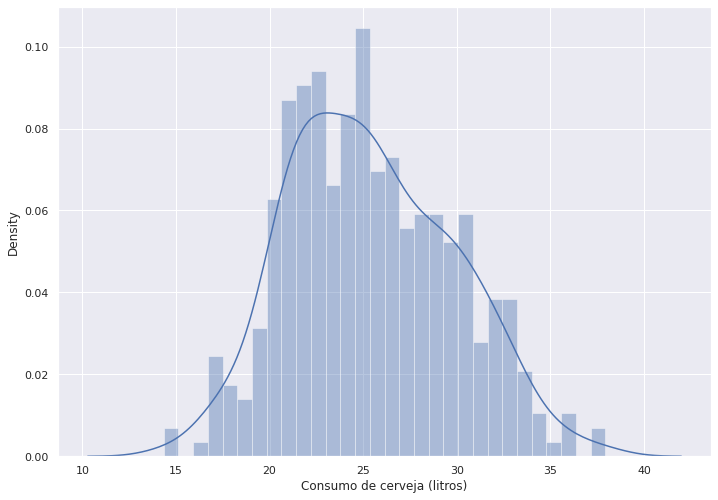

In [6]:
# Analisar distribuição e identificar outliers
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_consumo_cerveja['Consumo de cerveja (litros)'], bins=30)
plt.show()

                             Temperatura Media (C)  ...  Consumo de cerveja (litros)
Temperatura Media (C)                         1.00  ...                         0.57
Temperatura Minima (C)                        0.86  ...                         0.39
Temperatura Maxima (C)                        0.92  ...                         0.64
Precipitacao (mm)                             0.02  ...                        -0.19
Final de Semana                              -0.05  ...                         0.51
Consumo de cerveja (litros)                   0.57  ...                         1.00

[6 rows x 6 columns]


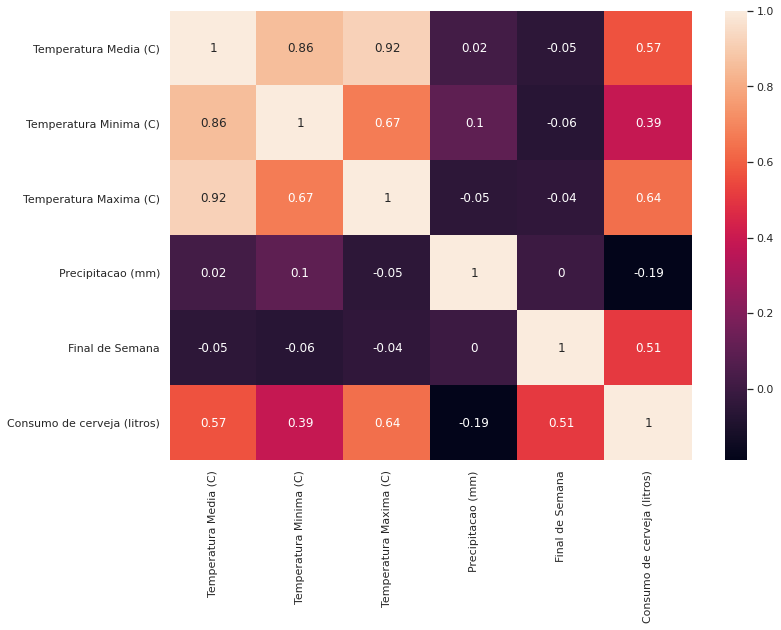

In [26]:
#Correlação de variáveis
correlation_matrix = df_consumo_cerveja.corr().round(2)
print(correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True)